In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Exploration des données

In [120]:
df = pd.read_csv("data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

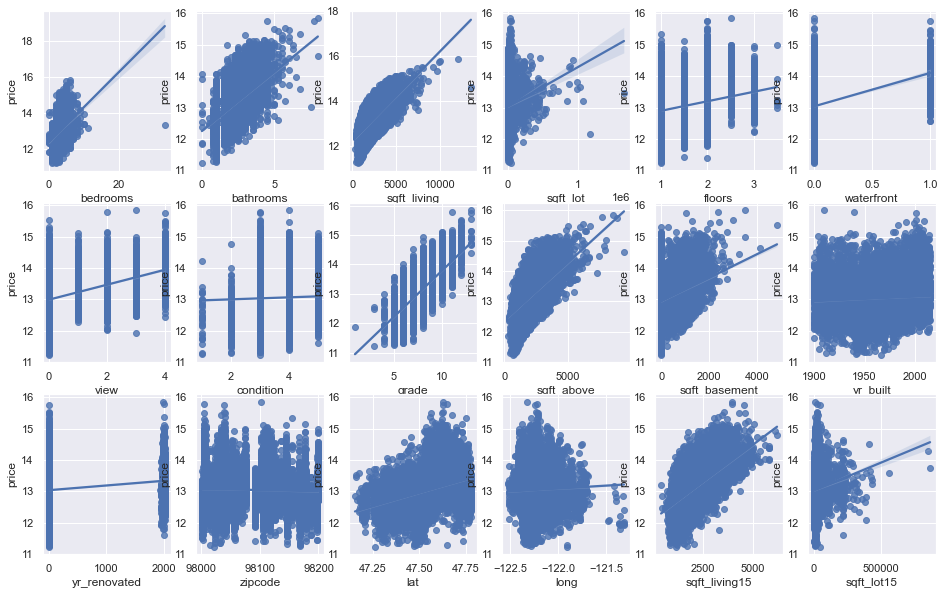

In [122]:
columns = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront",
"view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated",
"zipcode","lat","long","sqft_living15","sqft_lot15"
]

fig, axes = plt.subplots(3, 6,figsize=(16,10))
for i in range(len(columns)):
    if i < 6:
        sns.regplot(ax=axes[0,i], x=df[columns[i]], y=np.log(df["price"]))
    elif i < 12:
        sns.regplot(ax=axes[1,i-6], x=df[columns[i]], y=np.log(df["price"]))
    else:
        sns.regplot(ax=axes[2,i-12], x=df[columns[i]], y=np.log(df["price"]))

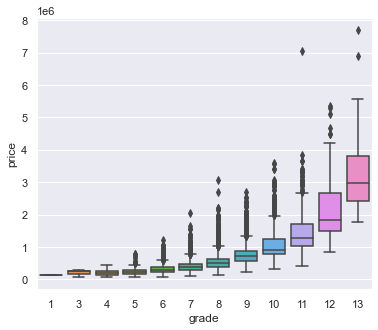

In [123]:
sns.boxplot(data=df,x="grade",y="price")
sns.set(rc={'figure.figsize':(6,5)})

# Préparation des données

In [124]:
df["date"] = pd.to_datetime(df["date"])
df["date"] = (df["date"] - df["date"].min()).dt.days
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,221,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,299,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,221,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,292,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,19,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,297,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,52,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,259,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [125]:
X = df.drop("price", axis=1)
y = np.log1p(df["price"])

y

0        12.309987
1        13.195616
2        12.100718
3        13.311331
4        13.142168
           ...    
21608    12.793862
21609    12.899222
21610    12.904461
21611    12.899222
21612    12.691584
Name: price, Length: 21613, dtype: float64

# Modéles de regression linéaire


In [126]:
from sklearn.linear_model import LinearRegression,ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from scipy.linalg import LinAlgWarning

warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

param_ridge = {"alpha": np.arange(0.1, 10, 0.1)}
param_lasso = {"alpha": np.arange(0.1, 1, 0.1)}
grid_lasso = GridSearchCV(Lasso(), param_lasso, cv=5) #détermination du meilleur hyperparamètre alpha de Lasso
grid_ridge = GridSearchCV(Ridge(), param_ridge, cv=5) #détermination du meilleur hyperparamètre alpha de Ridge
grid_lasso.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)
print( f"Lasso : {grid_lasso.best_params_} Ridge : {grid_ridge.best_params_}")

Lasso : {'alpha': 0.1} Ridge : {'alpha': 0.1}


In [128]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.7776190274942608

In [129]:
reg = ElasticNet().fit(X_train,y_train)
reg.score(X_test,y_test)

0.549934504035267

In [130]:
reg = Ridge(alpha=0.1).fit(X_train,y_train)
reg.score(X_test,y_test)

0.7776205641037423

In [131]:
reg = Lasso(alpha=0.1).fit(X_train,y_train)
reg.score(X_test,y_test)

0.5516765659413019